# DBSCAN

In [1]:
using Clustering, Gadfly, DataFrames

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /home/pika/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


In [2]:
data = DataFrame(0.35 * randn(250, 2) .+ [1.0, 1.0]', [:x, :y])
append!(data, DataFrame(0.35 * randn(250, 2) .+ [-1.0, -1.0]', [:x, :y]))
append!(data, DataFrame(0.35 * randn(250, 2) .+ [1.0, -1.0]', [:x, :y]))

,x,y
,Float64,Float64
1,0.969878,0.863195
2,1.49629,0.98227
3,0.925801,1.1117
4,1.07247,1.60459
5,0.329086,1.11841
6,1.69892,0.967332
7,0.704784,1.12346
8,1.59896,0.792611
9,1.02947,0.840678


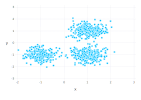

In [3]:
plot(data, x=:x, y=:y, Geom.point)

In [4]:
matrix = Matrix(Matrix(data)')

2×750 Array{Float64,2}:
 0.969878  1.49629  0.925801  1.07247  …   1.57633    1.41997    1.7783  
 0.863195  0.98227  1.1117    1.60459     -0.707041  -0.601027  -0.676383

In [5]:
eps = 0.3
minpts = 9
clusters = dbscan(matrix, eps, min_neighbors=minpts, min_cluster_size=10)

3-element Array{DbscanCluster,1}:
 DbscanCluster(248, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  240, 241, 242, 243, 245, 246, 247, 248, 249, 250], [19, 22, 51, 68, 82, 102, 119, 120, 122, 132, 174, 183, 187, 198, 200, 203, 228, 564, 611])                                
 DbscanCluster(246, [251, 252, 253, 254, 255, 256, 257, 258, 259, 260  …  490, 491, 492, 493, 494, 495, 496, 497, 498, 500], [270, 297, 319, 340, 369, 387, 390, 399, 408, 413, 425, 432, 486, 499, 742])                            
 DbscanCluster(252, [501, 502, 503, 504, 505, 506, 507, 508, 509, 510  …  738, 739, 740, 741, 744, 745, 746, 747, 748, 749], [187, 319, 340, 408, 549, 564, 569, 571, 591, 598  …  638, 667, 677, 699, 706, 736, 737, 742, 743, 750])

In [6]:
clusters[1].core_indices

229-element Array{Int64,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 237
 239
 240
 241
 242
 243
 245
 246
 247
 248
 249
 250

In [7]:
data[:cluster] = "0"
for i = 1:length(clusters)
    data[clusters[i].core_indices, :cluster] = "$i"
end

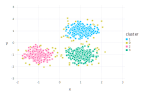

In [8]:
plot(data, x=:x, y=:y, color=:cluster, Geom.point)